In [1]:
import torch
words = open("names.txt").read().splitlines()

In [2]:
len(words)

32033

In [3]:
words[:3]

['emma', 'olivia', 'ava']

In [4]:
# Tokenisation
# . is the special character for start and end of the word
tokens = list('.') + sorted(list(set(''.join(words))))

In [5]:
len(tokens)

27

In [11]:
# Create sample bigrams
for word in words[:3]:
    word = list('.') + list(word) + list('.')
    bigrams = zip(word, word[1:])
    for bigram in bigrams:
        print(bigram)

('.', 'e')
('e', 'm')
('m', 'm')
('m', 'a')
('a', '.')
('.', 'o')
('o', 'l')
('l', 'i')
('i', 'v')
('v', 'i')
('i', 'a')
('a', '.')
('.', 'a')
('a', 'v')
('v', 'a')
('a', '.')


In [7]:
atoi = { a:i for i,a in enumerate(tokens) }
itoa = { i:a for a,i in atoi.items() }

In [8]:
atoi['a']

1

In [9]:
token_size = len(tokens)
N = torch.zeros((token_size, token_size), dtype=torch.int32)

In [12]:
# count bigram character occurances
for word in words:
    word = list('.') + list(word) + list('.')
    bigrams = zip(word, word[1:])
    for x,y in bigrams:
        ix, iy = atoi[x], atoi[y]
        N[ix, iy] = N[ix, iy] + 1

In [13]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

(-0.5, 26.5, 26.5, -0.5)

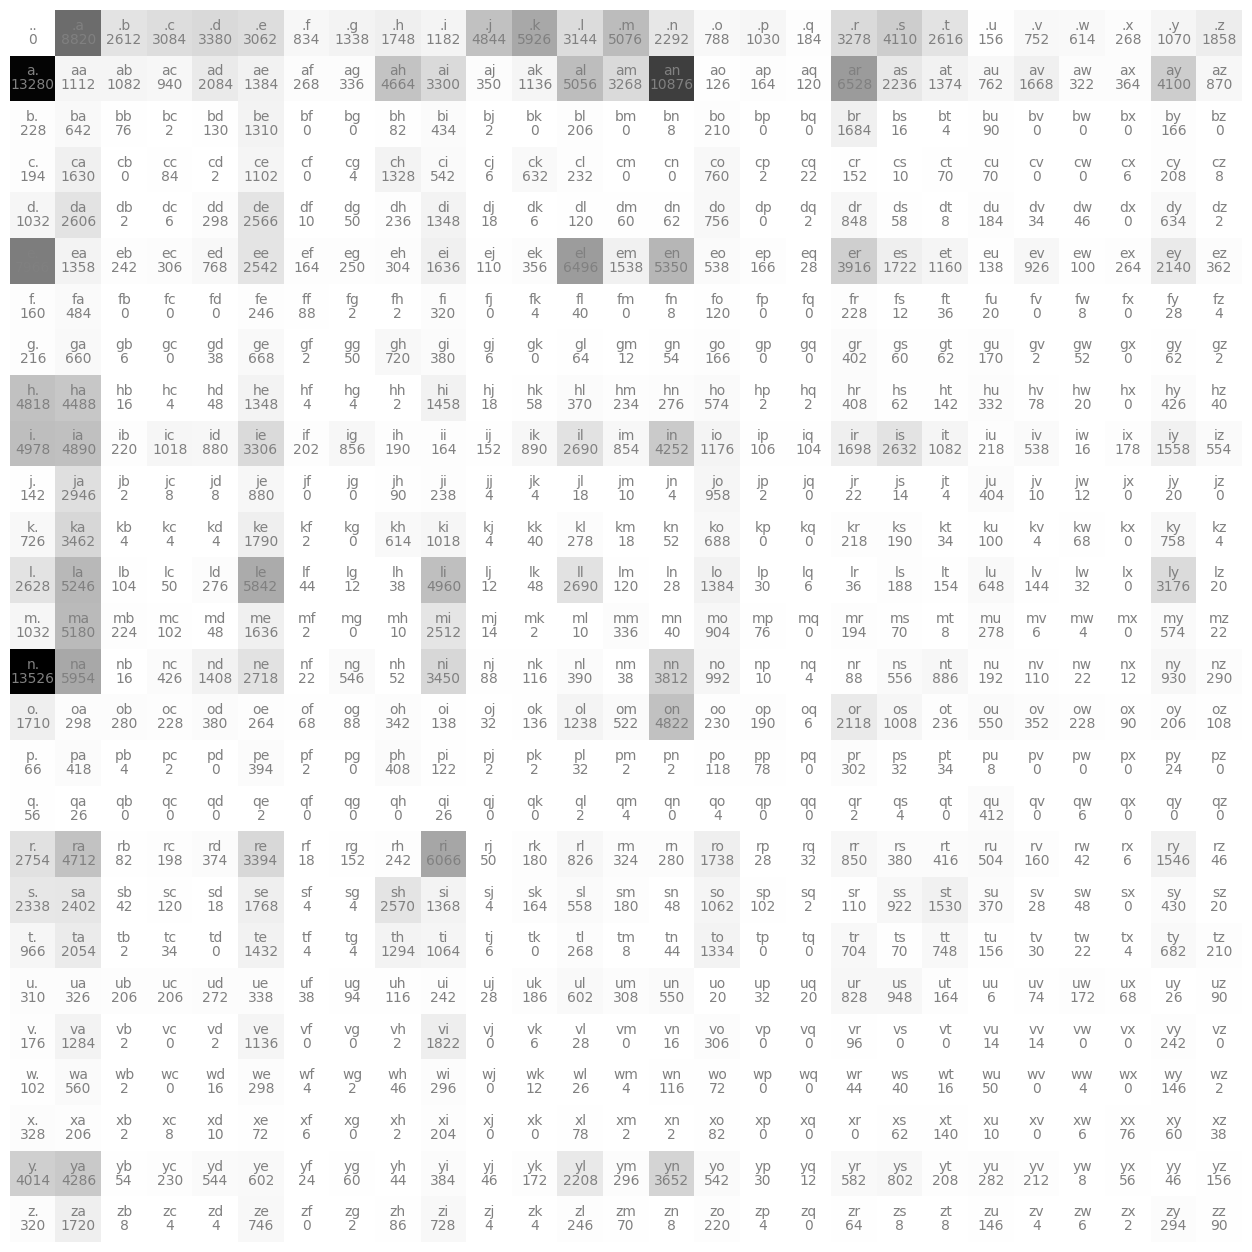

In [14]:
plt.figure(figsize=(16,16))
plt.imshow(N,  cmap='Greys')

for i in range(token_size):
    for j in range(token_size):
        chars = ''.join([itoa[i], itoa[j]])
        plt.text(j, i, chars, ha="center", va="bottom", color="gray")
        plt.text(j, i, N[i,j].item(), ha="center", va="top", color="gray")

plt.axis('off')

In [15]:
# Sampling from the model
# adding 1 so that we assume each possible bigram occurs atleast once, so the model never predict a zero possibility
# of any of the bigram created

# P contains the conditional probability of occurance of a character Cj followed by character Ci. ie, P(Cj/Ci).
P = (N+1).float() / N.sum(1, keepdim=True)
g = torch.Generator().manual_seed(2147483647)
# start at index 0

for i in range(20):
    out = []

    ix = 0

    while True:
        ix = torch.multinomial(P[ix], num_samples=1, replacement=True, generator=g).item()
        token = itoa[ix]
        out.append(token)
        if token == '.':
            print(''.join(out))
            break
    


cexze.
momasurailezitynn.
konimittain.
llayn.
ka.
da.
staiyaubrtthrigotai.
moliellavo.
ke.
teda.
ka.
emimmsade.
enkaviyny.
ftlspihinivenvorhlasu.
dsor.
br.
jol.
pen.
aisan.
ja.


In [16]:
# likelihood
total_likelihood = 0.0
training_data = words

for w in training_data:
    nll = 0.0 # -ve log likelyhood 
    counter = 0
    word = ['.'] + list(w) + ['.']
    for ch1, ch2 in zip(word, word[1:]):
        ix1 = atoi[ch1]
        ix2 = atoi[ch2]
        prob = P[ix1, ix2]
        nll += -torch.log(prob)
        counter += 1
    
#     print("Average log likelihood ", w, nll.item() / counter)
    total_likelihood += nll.item() / counter;

print("Average loss of the trainging dataset {0:.2f}".format(total_likelihood / len(training_data)))

Average loss of the trainging dataset 2.46


In [15]:
P[0].exp()

tensor([1.0000, 1.1476, 1.0416, 1.0493, 1.0542, 1.0490, 1.0131, 1.0211, 1.0277,
        1.0187, 1.0786, 1.0969, 1.0503, 1.0825, 1.0365, 1.0124, 1.0162, 1.0029,
        1.0525, 1.0663, 1.0417, 1.0025, 1.0118, 1.0097, 1.0042, 1.0169, 1.0295])

In [16]:
fig = plt.figure()

<Figure size 640x480 with 0 Axes>

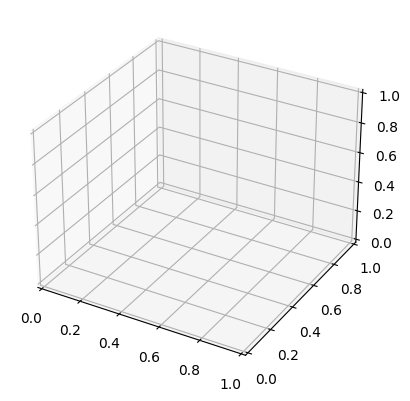

In [17]:
ax = plt.axes(projection='3d')

In [18]:
x = y = np.linspace(0,26, 27)

In [19]:
X, Y = np.meshgrid(x,y)

In [20]:
Z = P.cpu().numpy()

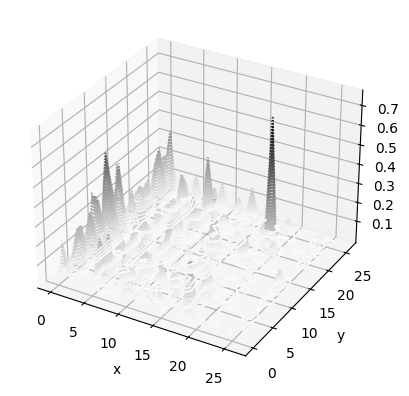

In [21]:
fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X, Y, Z, 50, cmap='binary')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z');

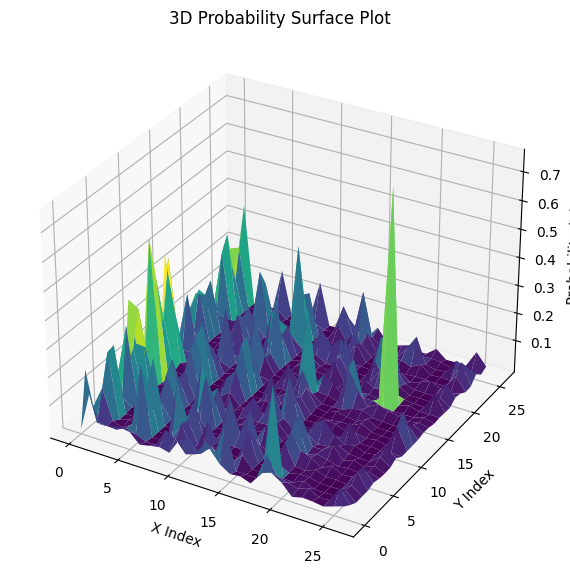

In [22]:
fig = plt.figure(figsize=(10, 7))
ax = fig.add_subplot(111, projection='3d')
ax.plot_surface(X, Y, P, cmap='viridis', edgecolor='none')
ax.set_xlabel("X Index")
ax.set_ylabel("Y Index")
ax.set_zlabel("Probability (Z)")
ax.set_title("3D Probability Surface Plot")
plt.show()